**#MARKETING CAPSTONE PROJECT - FLIGHT PRICE PREDICTION & INSIGHTS#**

In [1]:
#Import numpy and pandas
import pandas as pd
import numpy as np

#load our flight dataset
print("Loading the flight dataset...")
df = pd.read_csv('Clean_Dataset.csv')

df.info()  #columns and data types

#missing data? 
print(df.isnull().sum())  # Count NaNs by column

#data actually looks like
df.head()  

Loading the flight dataset...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops         

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**#TIME PERIOD CATEGORIZATION AND ROUTE CREATION#**

In [2]:
# Let's fix those inconsistent time periods - we have too many variations
def fix_time_of_day(time):
    # Simple mapping to standardize times - Early_Morning is just Morning
    mapping = {
        'Early_Morning': 'Morning',  # Early morning is still morning
        'Morning': 'Morning',
        'Afternoon': 'Afternoon',
        'Evening': 'Evening',
        'Night': 'Night'
    }
    return mapping.get(time, time)  # Return original if not in our mapping

# Clean up those messy time periods
df['departure_period'] = df['departure_time'].apply(fix_time_of_day)
df['arrival_period'] = df['arrival_time'].apply(fix_time_of_day)

# Create a proper route format instead of boring "A to B"
df['route'] = df['source_city'] + " → " + df['destination_city']  # Fancy arrow!

# Let's see what we've got
print("Departure periods we have:", df['departure_period'].unique())
print("Arrival periods we have:", df['arrival_period'].unique())

# Which routes do people fly most?
df['route'].value_counts().head()  # Just the top 5

Departure periods we have: ['Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Arrival periods we have: ['Night' 'Morning' 'Afternoon' 'Evening' 'Late_Night']


route
Delhi → Mumbai        15289
Mumbai → Delhi        14809
Delhi → Bangalore     14012
Bangalore → Delhi     13756
Bangalore → Mumbai    12939
Name: count, dtype: int64

**#FLIGHT PRICE ANALYSIS BY TIME, AIRLINE, CLASS, STOPS AND ROUTE#**


=== PRICES BY AIRLINE ===


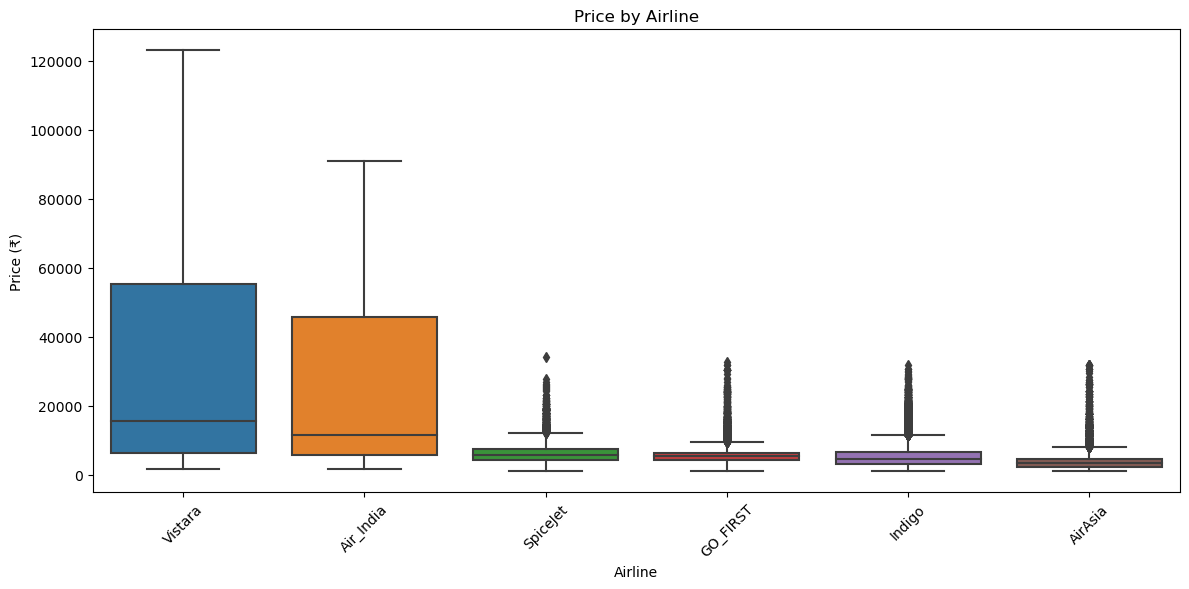

Average price by airline (highest to lowest):
              mean   count
airline                   
Vistara    30397.0  127859
Air_India  23507.0   80892
SpiceJet    6179.0    9011
GO_FIRST    5652.0   23173
Indigo      5324.0   43120
AirAsia     4091.0   16098

=== PRICES BY CLASS ===


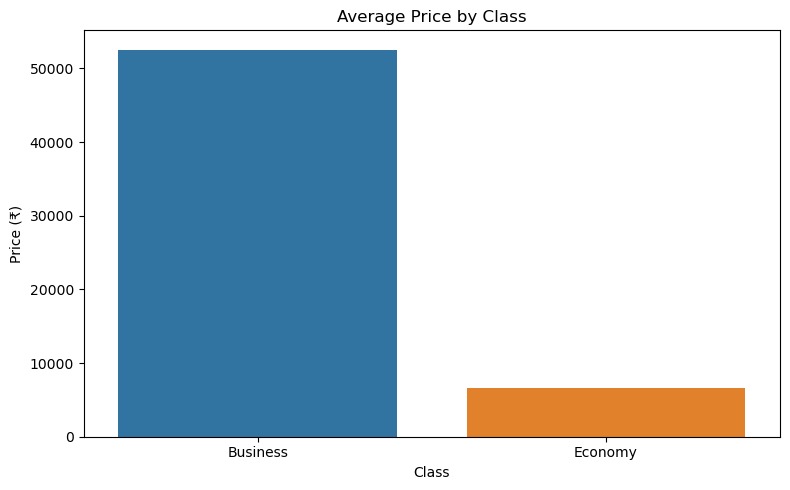


Average price by class:
             mean   count
class                    
Business  52540.0   93487
Economy    6572.0  206666

=== PRICES BY NUMBER OF STOPS ===


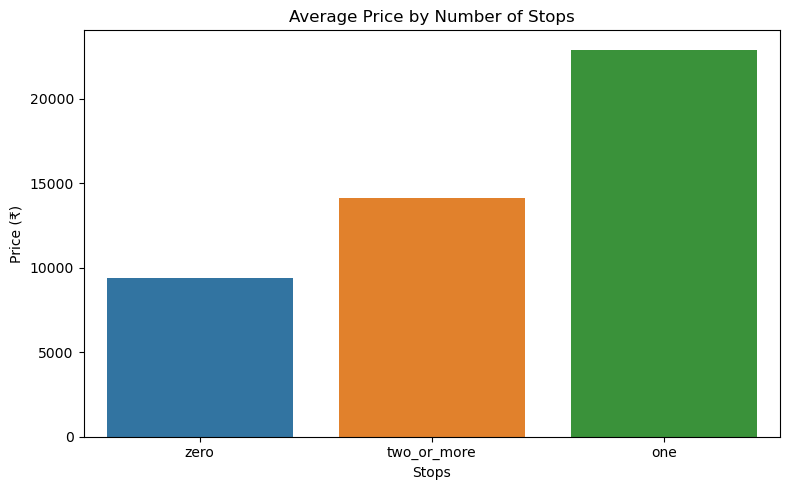


Average price by stops:
                mean   count
stops                       
zero          9376.0   36004
two_or_more  14113.0   13286
one          22901.0  250863

TOP 10 MOST EXPENSIVE ROUTES


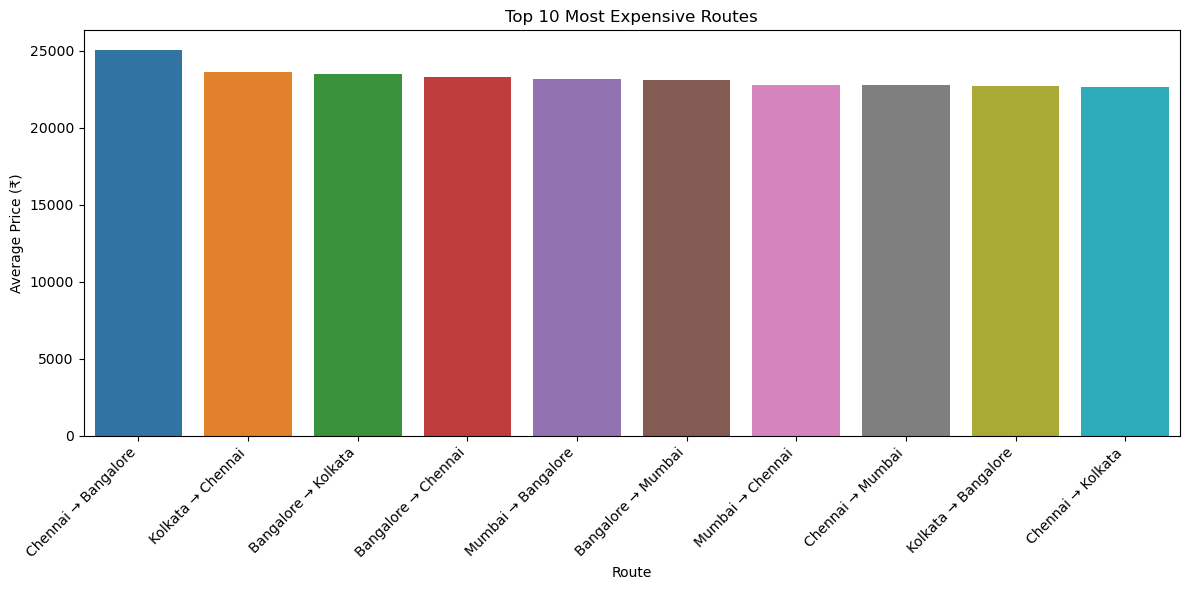


Top 10 expensive routes:
Chennai → Bangalore: ₹25,082 (6493.0 flights)
Kolkata → Chennai: ₹23,660 (6653.0 flights)
Bangalore → Kolkata: ₹23,500 (10028.0 flights)
Bangalore → Chennai: ₹23,322 (6410.0 flights)
Mumbai → Bangalore: ₹23,148 (12885.0 flights)
Bangalore → Mumbai: ₹23,129 (12939.0 flights)
Mumbai → Chennai: ₹22,782 (10130.0 flights)
Chennai → Mumbai: ₹22,766 (9338.0 flights)
Kolkata → Bangalore: ₹22,745 (9824.0 flights)
Chennai → Kolkata: ₹22,670 (6983.0 flights)

CLASS AND STOPS COMBINED EFFECT


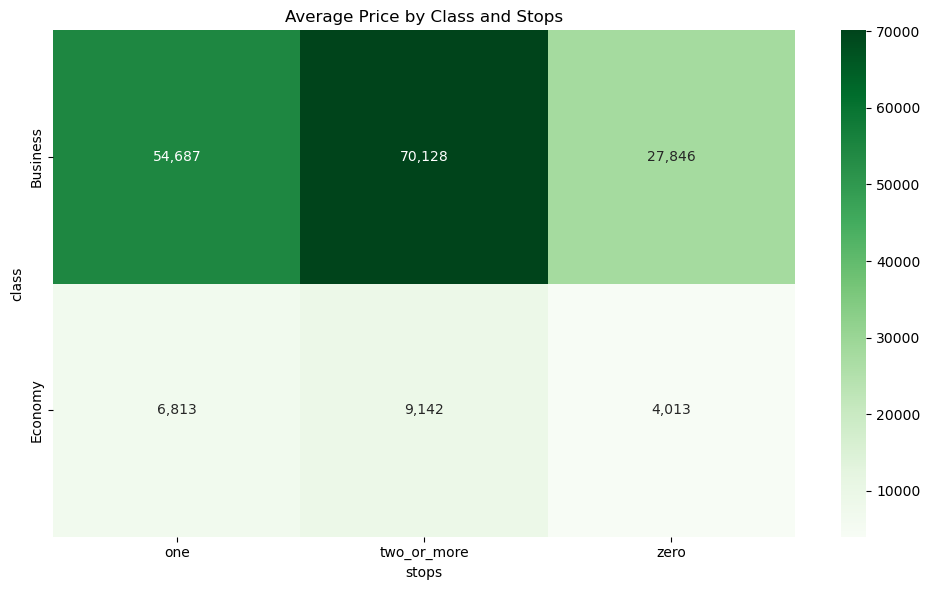

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#AIRLINE ANALYSIS
print("\n=== PRICES BY AIRLINE ===")
plt.figure(figsize=(12, 6))
# Sort airlines by average price
airline_stats = df.groupby('airline')['price'].agg(['mean', 'count']).sort_values('mean', ascending=False)
airline_order = airline_stats.index
#Create the plot
sns.boxplot(x='airline', y='price', data=df, order=airline_order)
plt.title('Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Price (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('airline_price_boxplot.png')
plt.show()
#Print average prices
print("Average price by airline (highest to lowest):")
print(airline_stats.round(0))
#CLASS ANALYSIS
print("\n=== PRICES BY CLASS ===")
class_stats = df.groupby('class')['price'].agg(['mean', 'count']).sort_values('mean', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=class_stats.index, y=class_stats['mean'])
plt.title('Average Price by Class')
plt.xlabel('Class')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('class_price_barplot.png')
plt.show()
print("\nAverage price by class:")
print(class_stats.round(0))
# STOPS ANALYSIS
print("\n=== PRICES BY NUMBER OF STOPS ===")
stops_stats = df.groupby('stops')['price'].agg(['mean', 'count']).sort_values('mean')
plt.figure(figsize=(8, 5))
sns.barplot(x=stops_stats.index, y=stops_stats['mean'])
plt.title('Average Price by Number of Stops')
plt.xlabel('Stops')
plt.ylabel('Price (₹)')
plt.tight_layout()
plt.savefig('stops_price_barplot.png')
plt.show()
print("\nAverage price by stops:")
print(stops_stats.round(0))
# Create route if needed and analyze expensive routes
if 'route' not in df.columns and 'source_city' in df.columns and 'destination_city' in df.columns:
    print("\nCreating route from source and destination cities...")
    df['route'] = df['source_city'] + ' → ' + df['destination_city']
if 'route' in df.columns:
    print("\nTOP 10 MOST EXPENSIVE ROUTES")
    route_stats = df.groupby('route').agg(
        avg_price=('price', 'mean'),
        num_flights=('price', 'count')
    ).sort_values('avg_price', ascending=False)
    
    expensive_routes = route_stats.head(10)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=expensive_routes.index, y=expensive_routes['avg_price'])
    plt.title('Top 10 Most Expensive Routes')
    plt.xlabel('Route')
    plt.ylabel('Average Price (₹)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('expensive_routes_barplot.png')
    plt.show()
    
    print("\nTop 10 expensive routes:")
    for route, row in expensive_routes.iterrows():
        print(f"{route}: ₹{row['avg_price']:,.0f} ({row['num_flights']} flights)")
#COMBINED ANALYSIS - Class and Stops
print("\nCLASS AND STOPS COMBINED EFFECT")
combined = df.groupby(['class', 'stops'])['price'].mean().unstack().round(0)
plt.figure(figsize=(10, 6))
sns.heatmap(combined, annot=True, fmt=',.0f', cmap='Greens')
plt.title('Average Price by Class and Stops')
plt.tight_layout()
plt.savefig('class_stops_heatmap.png')
plt.show()

**#IMPACT OF BOOKING LEAD TIME AND FLIGHT DURATION ON PRICE#**

Price range: ₹1,105 - ₹123,071
Days left range: 1 - 49
Duration range: 0.83 - 49.83 hours


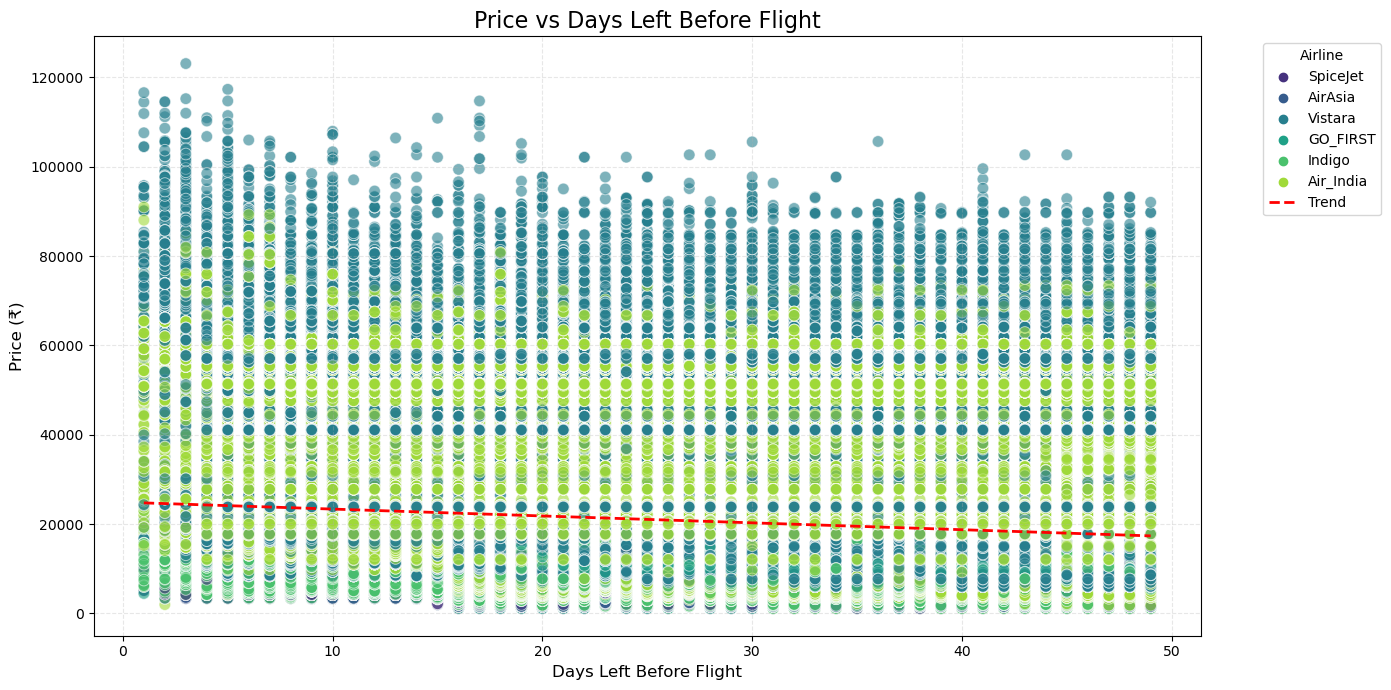


Creating booking window categories...

Average Price by Booking Window:
                      mean   count        min          max
booking_window                                            
Last Week       ₹26,451.23   32113  ₹1,977.00  ₹123,071.00
1-2 Weeks       ₹23,534.11   49145  ₹1,998.00  ₹110,850.00
2-4 Weeks       ₹19,754.19   97234  ₹1,105.00  ₹114,705.00
1+ Month        ₹19,260.92  121661  ₹1,105.00  ₹105,638.00


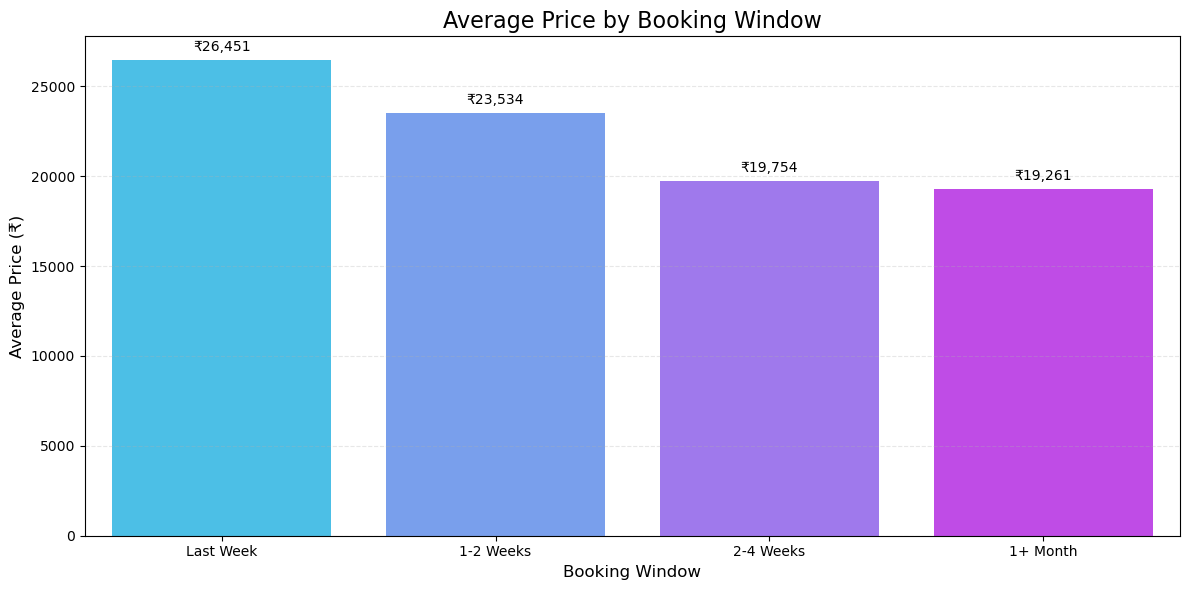


Analyzing flight durations...

Average Price by Flight Duration:
                        mean   count        min          max
duration_bracket                                            
Short (<2h)        ₹5,808.18   10396  ₹1,105.00   ₹49,928.00
Medium (2-4h)     ₹10,588.64   27344  ₹1,105.00   ₹59,573.00
Long (4-8h)       ₹15,697.43   58834  ₹1,105.00  ₹111,437.00
Very Long (>8h)   ₹24,543.96  203579  ₹1,105.00  ₹123,071.00


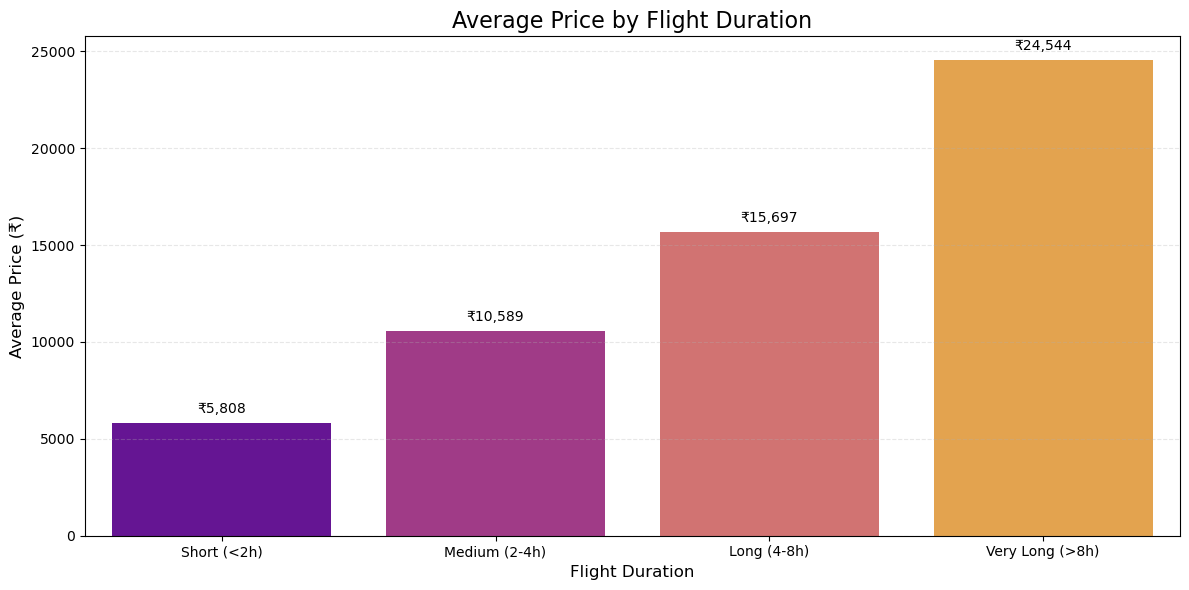


Analyzing combined effect of booking window and duration...

Average Price by Booking Window and Duration (₹):
duration_bracket  Short (<2h)  Medium (2-4h)  Long (4-8h)  Very Long (>8h)
booking_window                                                            
Last Week             8674.30       13802.68     21758.72         30068.24
1-2 Weeks             7478.48       12339.47     19169.70         27083.03
2-4 Weeks             5076.15        9867.95     14772.29         23305.63
1+ Month              4983.75        9552.54     13828.13         22957.23


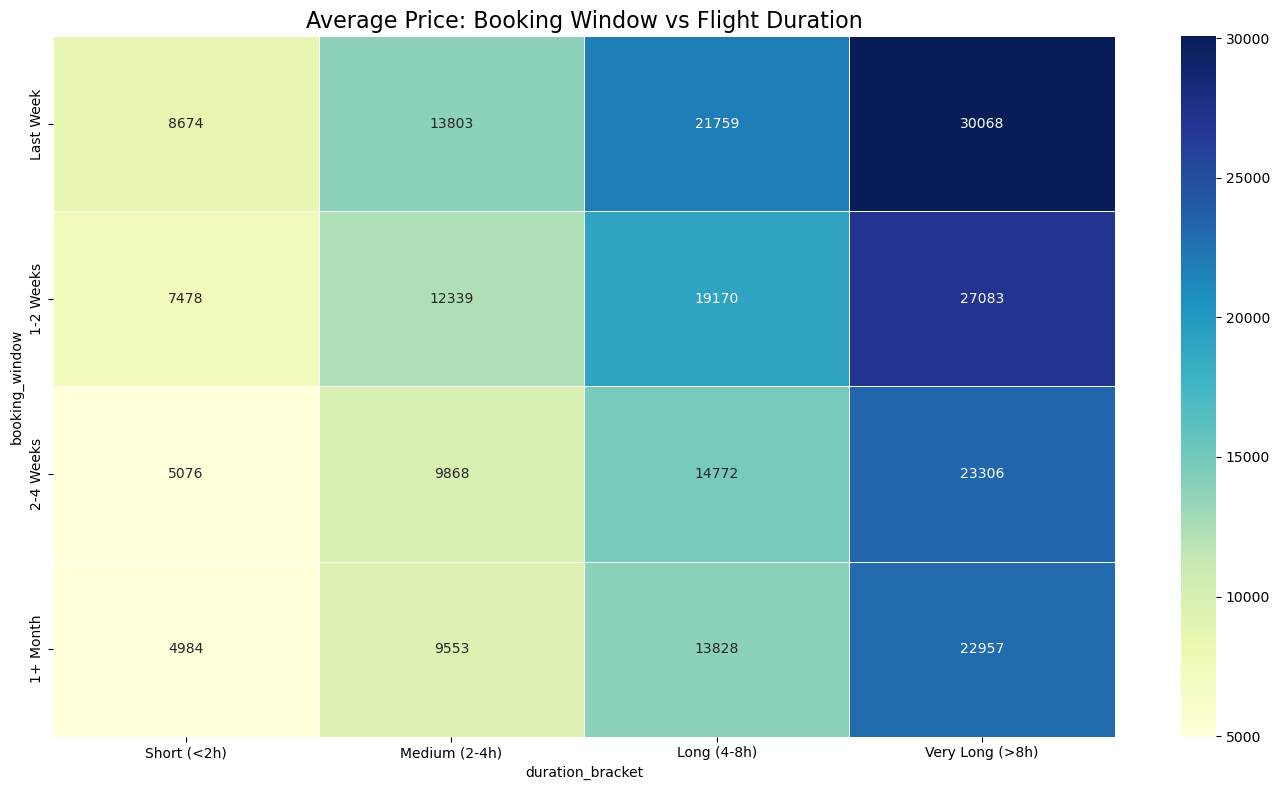

In [11]:
print(f"Price range: ₹{df['price'].min():,} - ₹{df['price'].max():,}")
print(f"Days left range: {df['days_left'].min()} - {df['days_left'].max()}")
print(f"Duration range: {df['duration'].min()} - {df['duration'].max()} hours")

#Days Left vs Price visualization
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='days_left', y='price', alpha=0.6, 
                hue='airline', palette='viridis', s=70)
plt.title('Price vs Days Left Before Flight', fontsize=16)
plt.xlabel('Days Left Before Flight', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

#Add a trend line to highlight the general pattern
try:
    #Try to add a trend line using numpy's polyfit
    z = np.polyfit(df['days_left'], df['price'], 1)
    p = np.poly1d(z)
    plt.plot(sorted(df['days_left'].unique()), p(sorted(df['days_left'].unique())), 
             "r--", linewidth=2, label="Trend")
    plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
except:
    # If that fails (e.g., too many points), use lowess smoothing
    plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('days_left_vs_price.png')
plt.show()

# 2. Create booking window categories
print("\nCreating booking window categories...")
df['booking_window'] = pd.cut(
    df['days_left'], 
    bins=[0, 7, 15, 30, 50], 
    labels=['Last Week', '1-2 Weeks', '2-4 Weeks', '1+ Month'],
    include_lowest=True  # Ensure all values are included
)

# Calculate and display statistics
print("\nAverage Price by Booking Window:")
booking_stats = df.groupby('booking_window')['price'].agg(['mean', 'count', 'min', 'max']).round(2)
booking_stats['mean'] = booking_stats['mean'].map('₹{:,.2f}'.format)
booking_stats['min'] = booking_stats['min'].map('₹{:,.2f}'.format)
booking_stats['max'] = booking_stats['max'].map('₹{:,.2f}'.format)
print(booking_stats)

# Visualize booking window stats
plt.figure(figsize=(12, 6))
# Extract numeric values from the booking_stats for plotting
numeric_means = df.groupby('booking_window')['price'].mean()
ax = sns.barplot(x=numeric_means.index, y=numeric_means.values, palette='cool')
plt.title('Average Price by Booking Window', fontsize=16)
plt.xlabel('Booking Window', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)

# Add value labels on top of bars
for i, v in enumerate(numeric_means.values):
    ax.text(i, v + 500, f'₹{v:,.0f}', ha='center', fontsize=10)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('booking_window_prices.png')
plt.show()

# 3. Flight duration analysis
print("\nAnalyzing flight durations...")
df['duration_bracket'] = pd.cut(
    df['duration'], 
    bins=[0, 2, 4, 8, 50], 
    labels=['Short (<2h)', 'Medium (2-4h)', 'Long (4-8h)', 'Very Long (>8h)'],
    include_lowest=True
)

# Calculate and display duration statistics
print("\nAverage Price by Flight Duration:")
duration_stats = df.groupby('duration_bracket')['price'].agg(['mean', 'count', 'min', 'max']).round(2)
duration_stats['mean'] = duration_stats['mean'].map('₹{:,.2f}'.format)
duration_stats['min'] = duration_stats['min'].map('₹{:,.2f}'.format)
duration_stats['max'] = duration_stats['max'].map('₹{:,.2f}'.format)
print(duration_stats)

# Visualize duration stats
plt.figure(figsize=(12, 6))
# Extract numeric values for plotting
numeric_duration_means = df.groupby('duration_bracket')['price'].mean()
ax = sns.barplot(x=numeric_duration_means.index, y=numeric_duration_means.values, palette='plasma')
plt.title('Average Price by Flight Duration', fontsize=16)
plt.xlabel('Flight Duration', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)

# Add value labels on top of bars
for i, v in enumerate(numeric_duration_means.values):
    ax.text(i, v + 500, f'₹{v:,.0f}', ha='center', fontsize=10)

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('duration_prices.png')
plt.show()

# 4. Combined analysis: Booking Window x Duration
print("\nAnalyzing combined effect of booking window and duration...")
combined_stats = df.groupby(['booking_window', 'duration_bracket'])['price'].mean().unstack().round(2)
print("\nAverage Price by Booking Window and Duration (₹):")
print(combined_stats)

# Create a heatmap for the combined analysis
plt.figure(figsize=(14, 8))
sns.heatmap(combined_stats, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Average Price: Booking Window vs Flight Duration', fontsize=16)
plt.tight_layout()
plt.savefig('booking_duration_heatmap.png')
plt.show()


Price Analysis by Airline and Days Left
Average Prices by Airline and Days Left (₹):
days_left        1         2         3         4         5         6   \
airline                                                                 
AirAsia    10867.71   9374.68   8732.80   7198.10   8300.84   7965.73   
Air_India  22995.68  33291.21  31648.96  26415.20  26999.79  26438.81   
GO_FIRST   11512.71  12028.42  10681.79   7913.30   7348.61   7163.32   
Indigo     13816.15  12166.58  11730.41   8754.83   8518.11   8376.47   
SpiceJet   13136.91  11362.18   9745.27   7961.19   7656.86   7455.42   
Vistara    28188.20  39808.80  38911.83  35310.99  34793.90  33091.39   

days_left        7         8         9         10  ...        40        41  \
airline                                            ...                       
AirAsia     8157.47   8653.07   9036.85  10112.17  ...   2878.56   2860.68   
Air_India  27335.65  26297.38  27805.68  27162.79  ...  21699.55  21802.21   
GO_FIRST    7871.

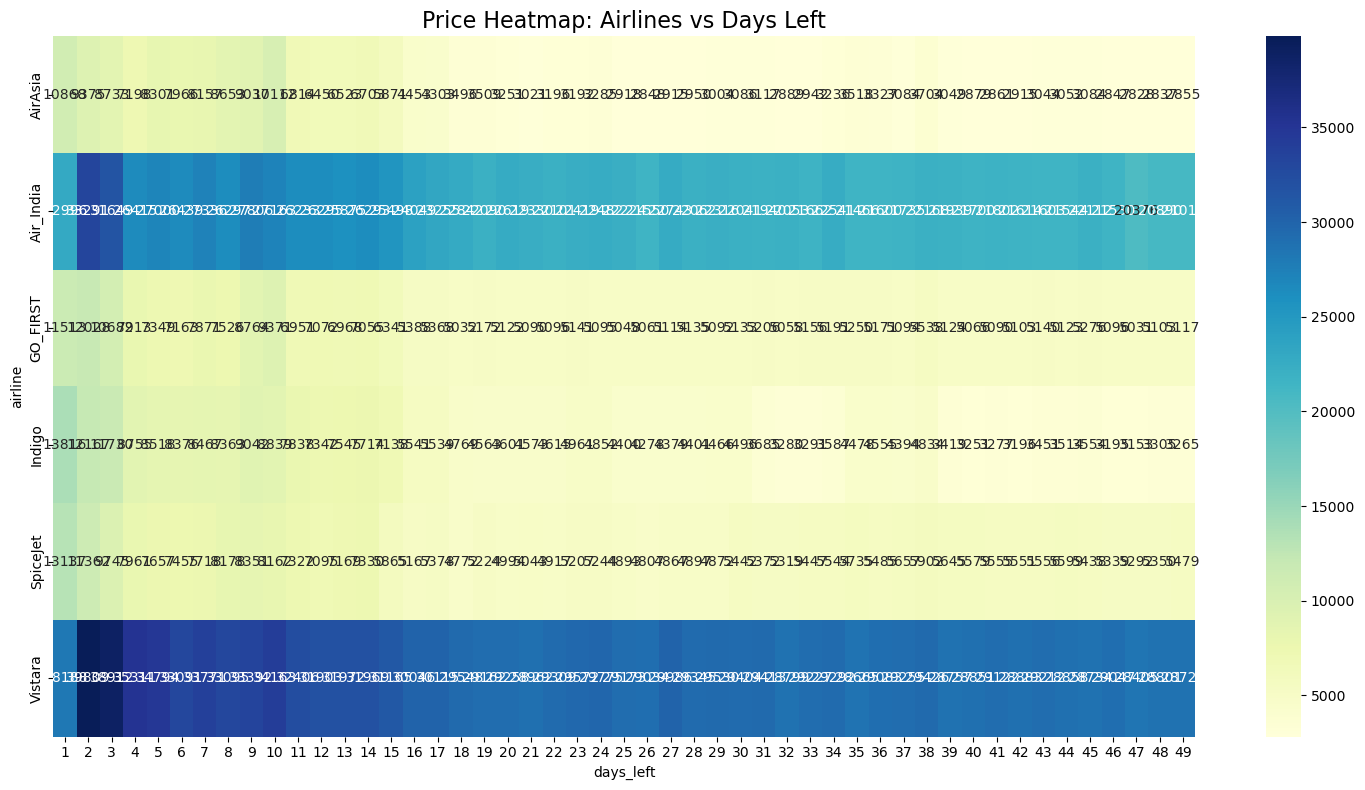


--- Price Analysis by Class and Days Left ---
Average Prices by Class and Days Left (₹):
days_left        1         2         3         4         5         6   \
class                                                                   
Business   65169.31  60455.85  60313.82  56120.29  56149.92  53643.31   
Economy    14613.18  13980.83  13174.05  10901.39  10605.92  10319.68   

days_left        7         8         9        10  ...        40        41  \
class                                             ...                       
Business   54501.17  53224.65  52981.20  54247.3  ...  51406.71  52153.95   
Economy    10471.87  10479.49  11352.92  11187.5  ...   4739.73   4774.03   

days_left        42        43        44        45        46        47  \
class                                                                   
Business   51583.18  52092.97  51383.28  51160.21  51209.79  51742.10   
Economy     4783.83   4893.28   4890.23   4908.19   4704.50   4669.65   

days_left      

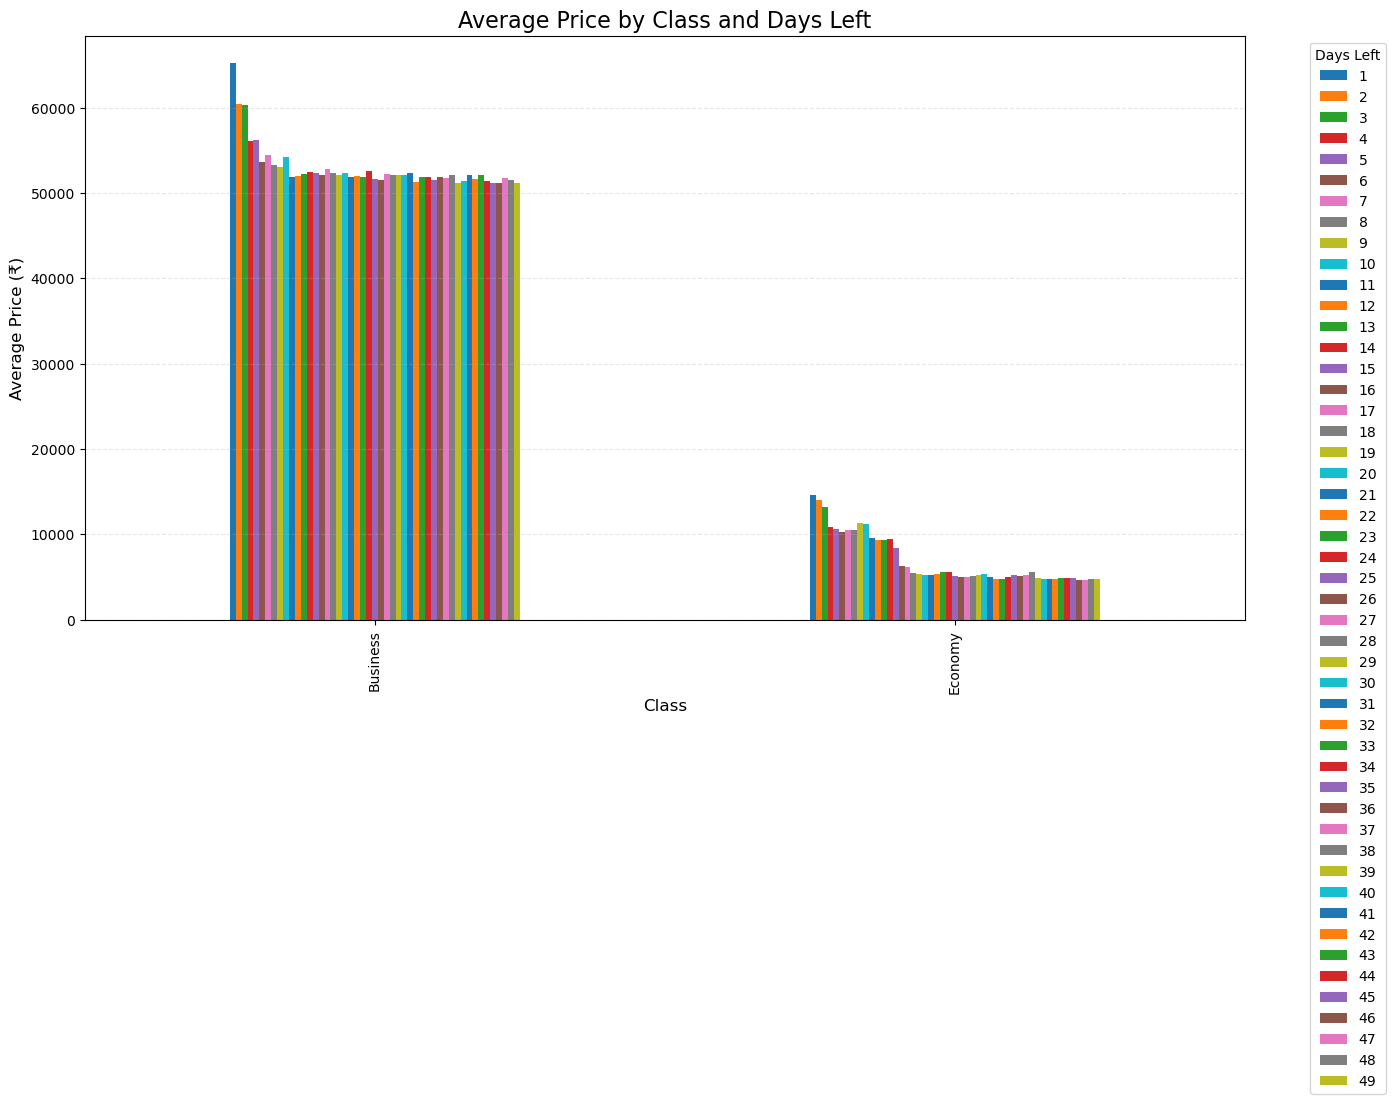


Price increase percentage (earliest to latest booking):
  Business: 27.5%
  Economy: 207.6%


In [12]:
# ANALYSIS 1: Airline vs Days Left
print("\nPrice Analysis by Airline and Days Left")
airline_days = df.pivot_table(
    values='price',
    index='airline',
    columns='days_left',  # Using days_left instead of booking_window
    aggfunc='mean'
).round(2)
# Display the results with some formatting
print("Average Prices by Airline and Days Left (₹):")
print(airline_days)
# Visualize this relationship with a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(airline_days, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Price Heatmap: Airlines vs Days Left', fontsize=16)
plt.tight_layout()
plt.savefig('airline_days_heatmap.png', dpi=300)
plt.show()
# ANALYSIS 2: Class vs Days Left
print("\n--- Price Analysis by Class and Days Left ---")
class_days = df.pivot_table(
    values='price',
    index='class',
    columns='days_left', 
    aggfunc='mean'
).round(2)
# Display the class results
print("Average Prices by Class and Days Left (₹):")
print(class_days)
#comparison
plt.figure(figsize=(16, 8))  
class_days.plot(kind='bar', ax=plt.gca())
plt.title('Average Price by Class and Days Left', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend(title='Days Left', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside
plt.subplots_adjust(bottom=0.15, right=0.85)  
plt.savefig('class_days_bar.png', dpi=300)
plt.show()
# Calculate percentage increase from earliest to latest booking
# This shows the "booking early" discount for each class
if len(class_days.columns) > 1:
    # For days_left, the lowest number means closest to flight date
    # and highest number means earliest booking
    latest_col = min(class_days.columns)  # Latest booking (closest to flight)
    earliest_col = max(class_days.columns)  # Earliest booking (furthest from flight)
    
    print("\nPrice increase percentage (earliest to latest booking):")
    for class_type in class_days.index:
        early_price = class_days.loc[class_type, earliest_col]
        late_price = class_days.loc[class_type, latest_col]
        pct_increase = ((late_price - early_price) / early_price) * 100
        print(f"  {class_type}: {pct_increase:.1f}%")

**#REGRESSION MODEL & RANDOM FOREST FOR PRICE PREDICTION#**


Linear Regression results:
RMSE: ₹7,023.08
MAE: ₹4,624.07
R²: 0.9043

Random Forest results:
RMSE: ₹3,280.99
MAE: ₹1,357.96
R²: 0.9791


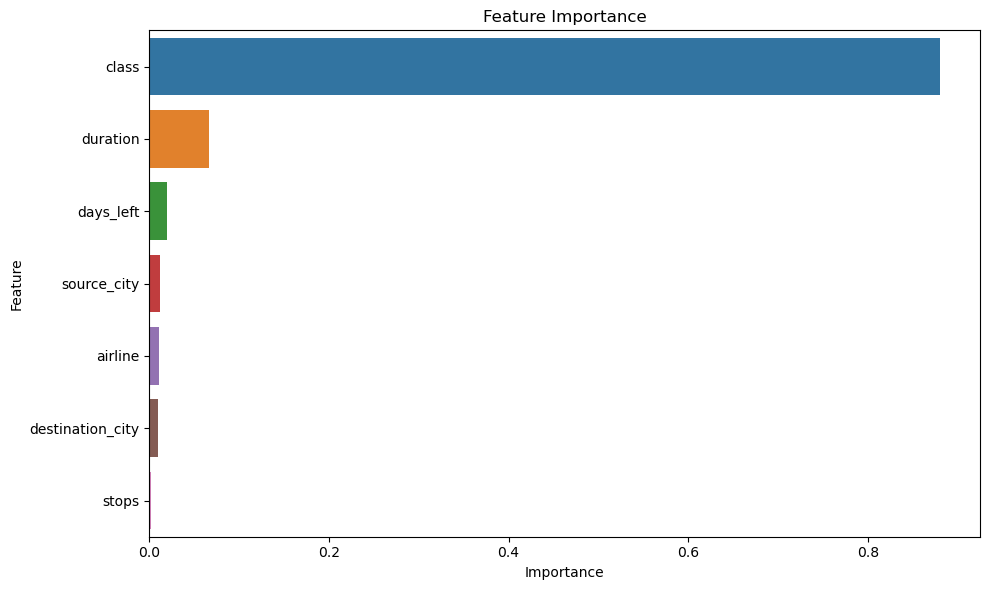

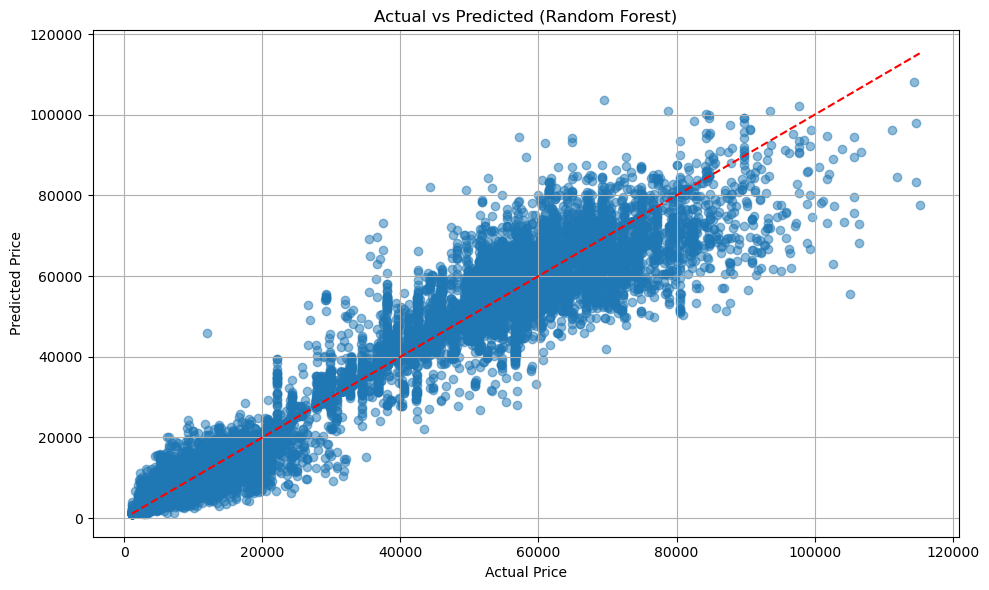


Error Stats:
        Actual Price      Predicted         Error     Abs Error
count   60031.000000   60031.000000  60031.000000  60031.000000
mean    20894.012910   20928.338389    -34.325479   1357.960024
std     22704.423812   22591.798404   3280.842716   2986.807835
min      1105.000000    1105.000000 -37820.680000      0.000000
25%      4788.000000    4908.980000   -393.915000     17.997500
50%      7425.000000    7476.286190     -2.630000    246.610000
75%     42521.000000   43020.090000     79.760000   1163.422167
max    115211.000000  108034.926667  49636.984500  49636.984500

Mean Absolute Error by Price Range:
Price Range
(1104.999, 4415.0]      371.467426
(4415.0, 6132.0]        448.989478
(6132.0, 11069.0]       821.947783
(11069.0, 49725.0]     1798.780314
(49725.0, 115211.0]    3367.825861
Name: Abs Error, dtype: float64


In [13]:
#import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# select features
features = ['airline', 'source_city', 'destination_city', 'stops', 'class', 'duration', 'days_left']
X = df[features].copy()
y = df['price']
# encode categorical features
encoders = {}
for col in X.select_dtypes(include='object'):
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le
#Standard scaler
scaler = StandardScaler()
X[['duration', 'days_left']] = scaler.fit_transform(X[['duration', 'days_left']])
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
#train and evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    
    results[name] = {
        'rmse': np.sqrt(mse),
        'mae': mae,
        'r2': r2,
        'preds': preds,
        'model': model
    }
    
    print(f"\n{name} results:")
    print(f"RMSE: ₹{np.sqrt(mse):,.2f}")
    print(f"MAE: ₹{mae:,.2f}")
    print(f"R²: {r2:.4f}")
# feature importance from Random forest
rf = results['Random Forest']['model']
feat_imp = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
# plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, y='Feature', x='Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()
# actual price vs predicted price plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, results['Random Forest']['preds'], alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.savefig('actual_vs_predicted.png', dpi=300)
plt.show()
# error analysis
errors = y_test - results['Random Forest']['preds']
error_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted': results['Random Forest']['preds'],
    'Error': errors,
    'Abs Error': abs(errors)
})
print("\nError Stats:")
print(error_df.describe())
#Error by price range
error_df['Price Range'] = pd.qcut(error_df['Actual Price'], q=5)
error_by_range = error_df.groupby('Price Range')['Abs Error'].mean()
print("\nMean Absolute Error by Price Range:")
print(error_by_range)

**#ANOMALY DETECTION FOR PRICE SPIKES#**

Loaded 300153 flight records
Price range: ₹1105 - ₹123071

--- Finding z-score outliers ---

--- Running Isolation Forest detection ---

=== Anomaly Analysis ===
Total flights: 300153
Anomalies found: 14431 (4.81%)
Normal avg price: ₹20,078.40
Anomaly avg price: ₹36,952.00
Anomaly price range: ₹1,526.00 - ₹123,071.00

Airlines with most suspicious prices:
  Vistara: 6054 flights
  Air_India: 3800 flights
  Indigo: 2136 flights
  GO_FIRST: 1202 flights
  AirAsia: 786 flights

Top strange-pricing routes:
  Mumbai → Delhi: 722 flights
  Delhi → Mumbai: 691 flights
  Delhi → Bangalore: 684 flights
  Bangalore → Delhi: 665 flights
  Mumbai → Bangalore: 646 flights


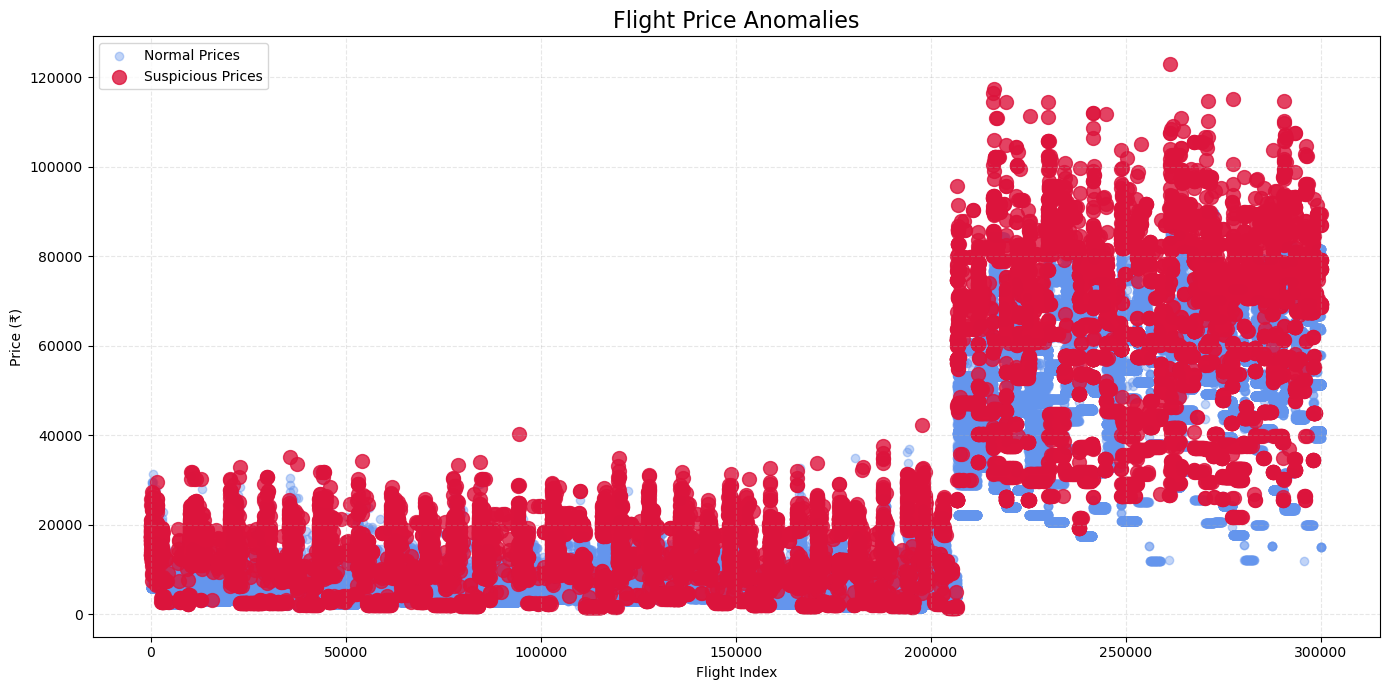

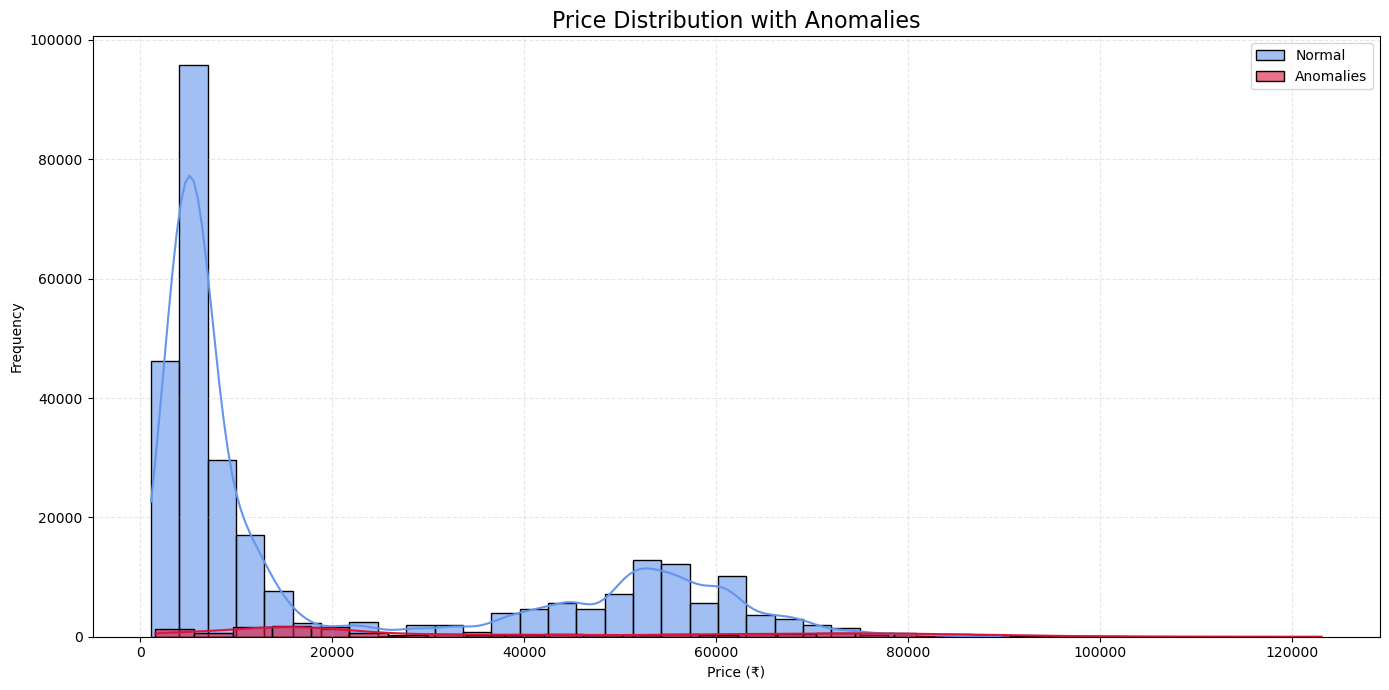

In [7]:
from sklearn.ensemble import IsolationForest
from scipy import stats

print(f"Loaded {len(df)} flight records")
print(f"Price range: ₹{df['price'].min()} - ₹{df['price'].max()}")

#Group by airline and route (we want to find anomalies within each route+airline combo)
groupby_cols = ['source_city', 'destination_city', 'airline']

# Make a copy for our results
flight_data = df.copy()  
flight_data['zscore_flag'] = False  # Changed from 'anomaly' to 'flag' for clarity

print("\n--- Finding z-score outliers ---")
# Z-score outlier detection - Find prices that are way off within each route-airline group
for route, group in flight_data.groupby(groupby_cols):
    # Get indexes for this group so we can update the main df
    idx = group.index
    
    #Basic stats for this group
    avg = group['price'].mean()
    std = group['price'].std()
    
    #Avoid division by zero - if std=0, all prices are identical (no anomalies)
    if std == 0 or np.isnan(std):
        flight_data.loc[idx, 'zscore'] = 0
        continue  # Skip to next group
        
    # Calculate z-score
    flight_data.loc[idx, 'zscore'] = (group['price'] - avg) / std
    
    #Flag as outlier if beyond ±3 (classic threshold)
    flight_data.loc[idx, 'zscore_flag'] = abs(flight_data.loc[idx, 'zscore']) > 3.0

# Let's also try Isolation Forest - better at detecting outliers in clusters
print("\n--- Running Isolation Forest detection ---")
flight_data['iforest_flag'] = False  # Changed from 'anomaly' to 'flag'

#setting min group size
MIN_GROUP_SIZE = 10

# Run isolation forest on each group
for route, group in flight_data.groupby(groupby_cols):
    idx = group.index
    
    # Skip tiny groups - not enough data points
    if len(group) < MIN_GROUP_SIZE:
        print(f"Skipping small group {route} with only {len(group)} flights")
        continue
    
    # Use the price for detection
    X = group[['price']]
    
    # This contamination value worked well in tests
    clf = IsolationForest(contamination=0.05, random_state=42)
    preds = clf.fit_predict(X)
    
    # -1 means outlier in Isolation Forest
    flight_data.loc[idx, 'iforest_flag'] = preds == -1

# Combine results - if either method flags it, consider it an anomaly
flight_data['is_anomaly'] = flight_data['zscore_flag'] | flight_data['iforest_flag']

# Get our two groups for analysis
weird_prices = flight_data[flight_data['is_anomaly']]
normal_prices = flight_data[~flight_data['is_anomaly']]

# Print stats
print("\n=== Anomaly Analysis ===")
print(f"Total flights: {len(flight_data)}")
print(f"Anomalies found: {len(weird_prices)} ({len(weird_prices)/len(flight_data)*100:.2f}%)")
print(f"Normal avg price: ₹{normal_prices['price'].mean():,.2f}")
print(f"Anomaly avg price: ₹{weird_prices['price'].mean():,.2f}")
print(f"Anomaly price range: ₹{weird_prices['price'].min():,.2f} - ₹{weird_prices['price'].max():,.2f}")

# Which airlines have the most anomalies?
print("\nAirlines with most suspicious prices:")
airline_counts = weird_prices['airline'].value_counts()
for airline, count in airline_counts.head().items():
    print(f"  {airline}: {count} flights")

# And which routes?
print("\nTop strange-pricing routes:")
routes = weird_prices['source_city'] + ' → ' + weird_prices['destination_city']
route_counts = routes.value_counts()
for route, count in route_counts.head().items():
    print(f"  {route}: {count} flights")

# Let's see how these anomalies look
plt.figure(figsize=(14, 7)) 
plt.scatter(normal_prices.index, normal_prices['price'], 
           alpha=0.4, color='cornflowerblue', label='Normal Prices')
plt.scatter(weird_prices.index, weird_prices['price'], 
           alpha=0.8, color='crimson', s=100, label='Suspicious Prices')
plt.title("Flight Price Anomalies", fontsize=16)
plt.xlabel('Flight Index')
plt.ylabel('Price (₹)')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('price_anomalies_scatter.png', dpi=300)
plt.show()

# Distribution of prices
plt.figure(figsize=(14, 7))
sns.histplot(normal_prices['price'], color='cornflowerblue', 
            label='Normal', kde=True, alpha=0.6, bins=30)
sns.histplot(weird_prices['price'], color='crimson', 
            label='Anomalies', kde=True, alpha=0.6, bins=30)
plt.title('Price Distribution with Anomalies', fontsize=16)
plt.xlabel('Price (₹)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('price_anomalies_histogram.png', dpi=300)
plt.show()

**#PRICE ELASTICITY OF DEMAND ANALYSIS#**


Point Elasticity Results:
Found data for 54 routes

Distribution of elasticity types:
category
Highly Elastic    24
Elastic           22
Inelastic          8
Name: count, dtype: int64

Elasticity by Class:
              mean  count       min       max
class                                        
Business -3.073618     24 -7.582944 -0.863081
Economy  -1.560449     30 -3.041453 -0.535427

Most price-sensitive routes:
                    route     class  avg_elasticity        category
36    Kolkata → Bangalore  Business       -7.582944  Highly Elastic
20        Delhi → Chennai  Business       -7.293644  Highly Elastic
22      Delhi → Hyderabad  Business       -5.998135  Highly Elastic
28  Hyderabad → Bangalore  Business       -5.091429  Highly Elastic
3   Bangalore → Hyderabad  Business       -4.812862  Highly Elastic
52       Mumbai → Kolkata  Business       -4.568745  Highly Elastic
5     Bangalore → Kolkata  Business       -3.461220  Highly Elastic
23      Delhi → Hyderabad   Economy

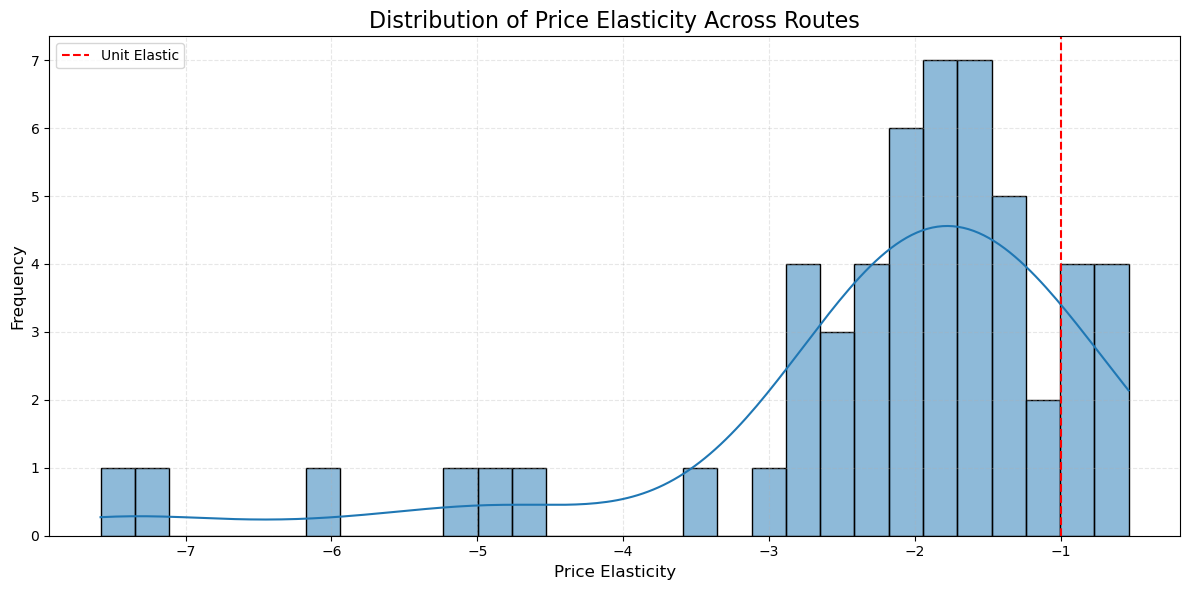

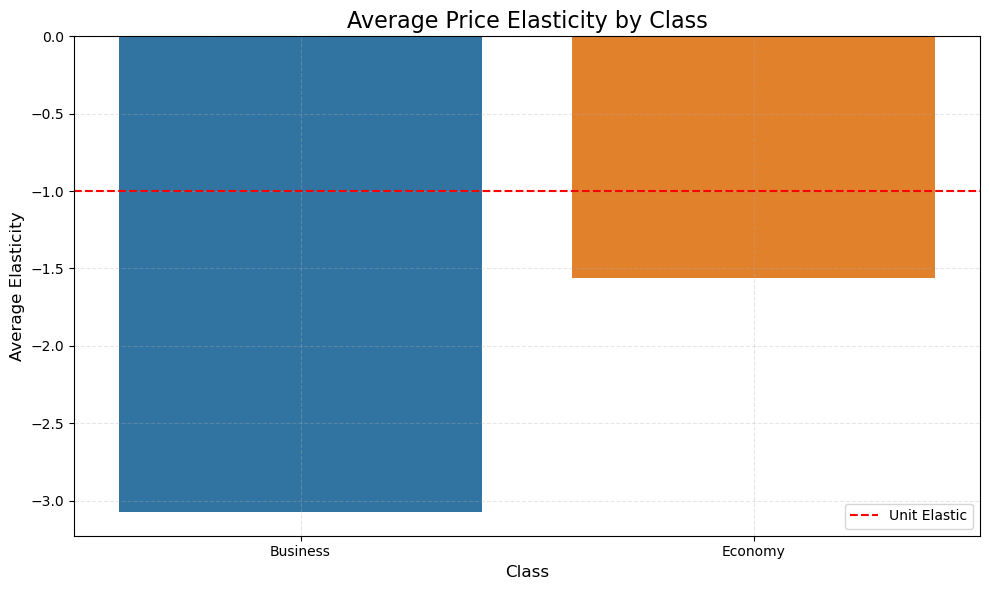

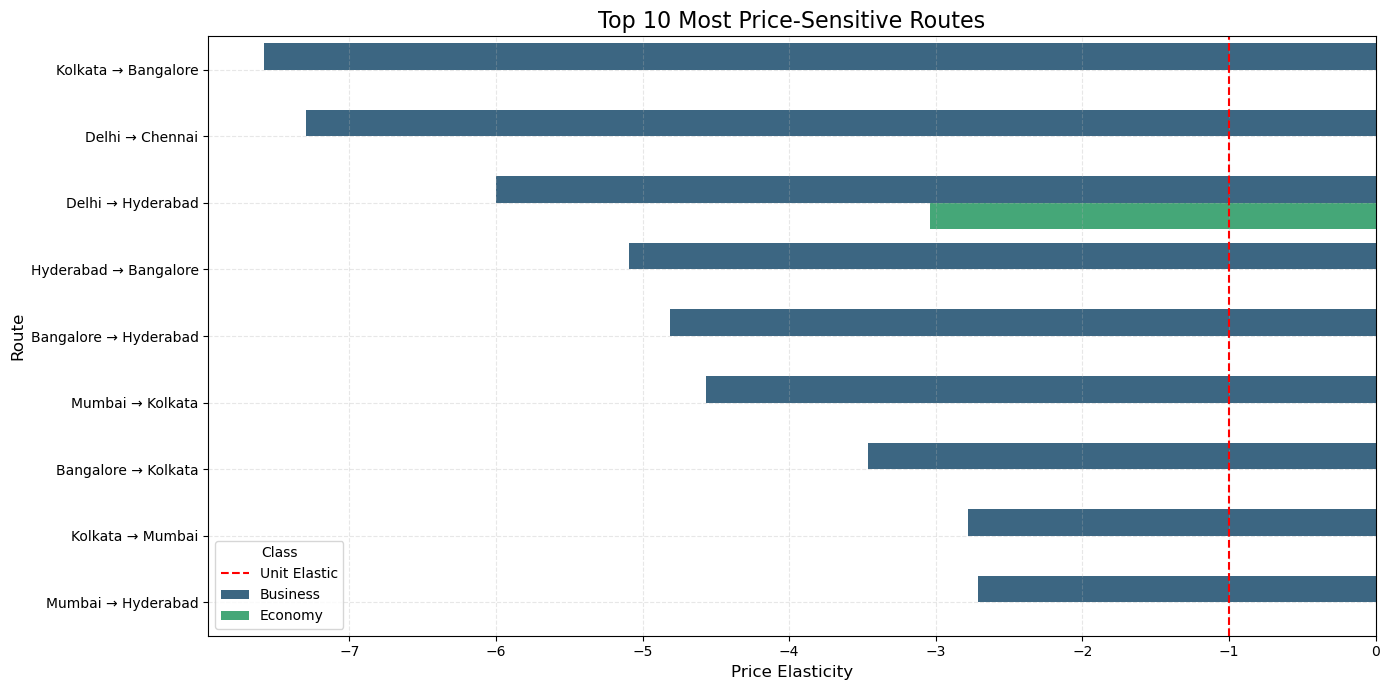

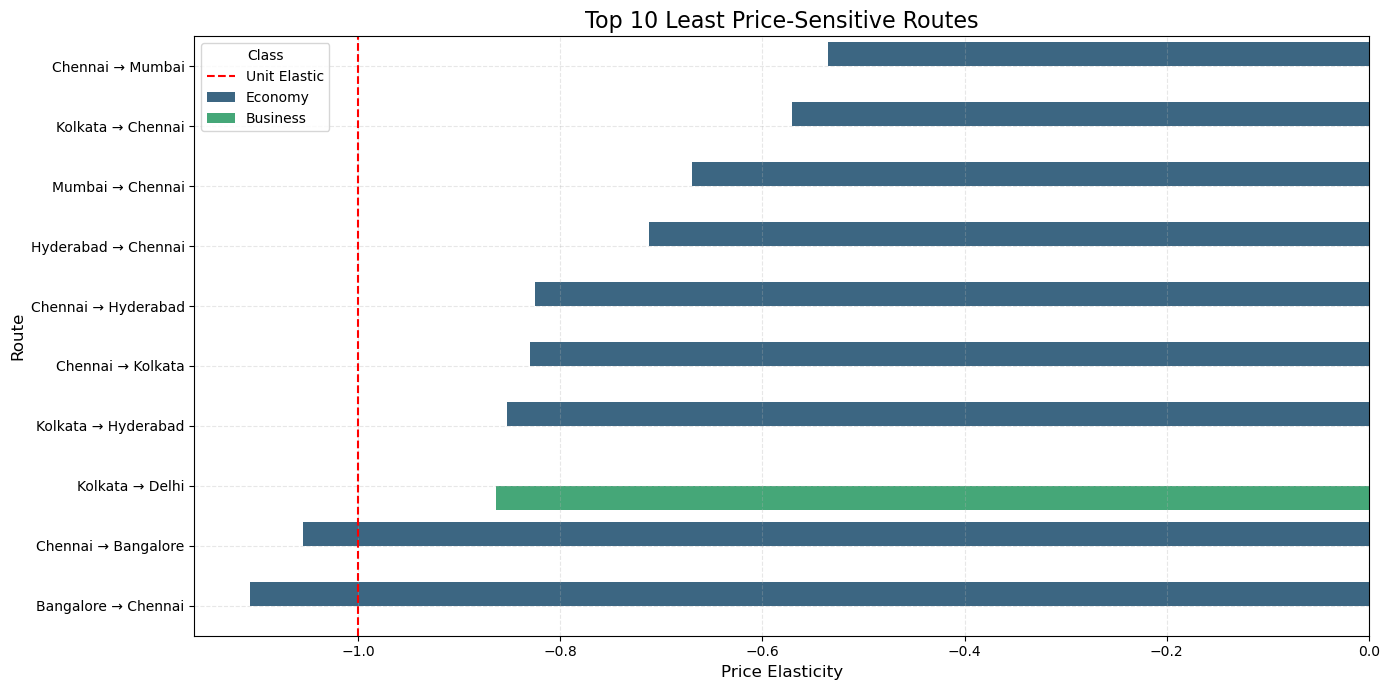

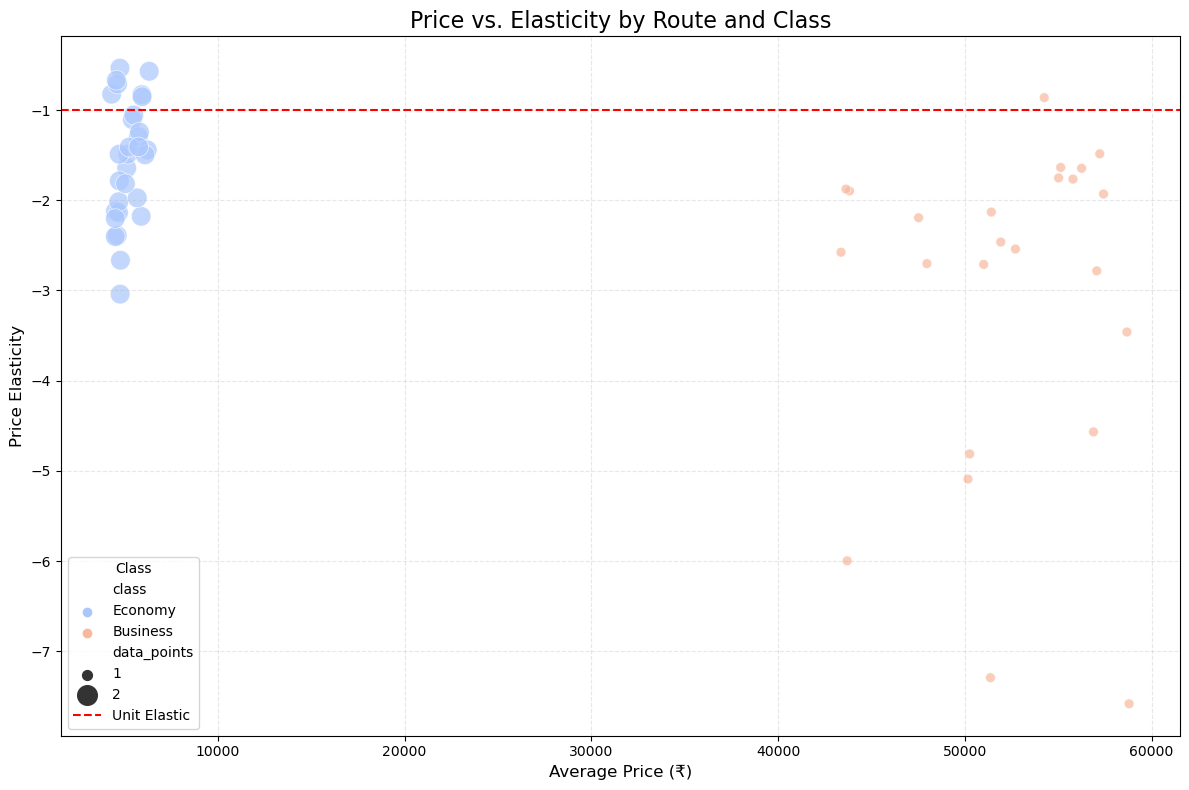

In [23]:
elasticity_data = []

def categorize_elasticity(e):
    if e >= 0:
        return 'Positive (Non-traditional)'
    elif e > -1:
        return 'Inelastic'
    elif e > -2:
        return 'Elastic'
    else:
        return 'Highly Elastic'
        
for idx, r_data in popular_routes.iterrows():
    rt = r_data['route']
    cls = r_data['class']
    
    #get data for this route+class
    df_route = grouped[(grouped['route'] == rt) & (grouped['class'] == cls)].copy()  # Add .copy() here
    
    if len(df_route) < 2:  # need 2+ points
        continue
    
    #sort by price - now safe with .copy()
    df_route.sort_values('avg_price', inplace=True)
    
    # calc elasticity between price points
    for i in range(len(df_route) - 1):
        # grab values we need
        p1 = df_route.iloc[i]['avg_price']
        p2 = df_route.iloc[i + 1]['avg_price']
        d1 = df_route.iloc[i]['bookings']
        d2 = df_route.iloc[i + 1]['bookings']
                
        # skip bad data points
        if p1 <= 0 or p2 <= 0 or d1 <= 0 or d2 <= 0:
            #print(f"Skipping {rt} - {cls}: Invalid data points")
            continue
        
        #arc elasticity formula
        p_avg = (p1 + p2) / 2
        d_avg = (d1 + d2) / 2
        
        # % changes
        p_chg = (p2 - p1) / p_avg
        d_chg = (d2 - d1) / d_avg
        
        #can't divide by zero
        if abs(p_chg) < 0.00001:
            continue
        
        #this is our elasticity
        e = d_chg / p_chg
         
        #filter outliers - sometimes get crazy values
        if abs(e) > 10:
            continue
        
        # get booking windows
        w1 = df_route.iloc[i]['booking_window']
        w2 = df_route.iloc[i + 1]['booking_window']
        
        # add to results
        elasticity_data.append({
            'route': rt,
            'class': cls,
            'price1': p1,
            'price2': p2,
            'demand1': d1,
            'demand2': d2,
            'window1': w1,
            'window2': w2,
            'elasticity': e  # renamed from point_elasticity
        })
# make df from results
results_df = pd.DataFrame(elasticity_data)
# only continue if we got some data
if len(results_df) > 0:
    # get stats by route
    route_stats = results_df.groupby(['route', 'class'])['elasticity'].agg(['mean', 'count', 'min', 'max'])
    route_stats = route_stats.reset_index()
    
    # rename cols for clarity
    route_stats.columns = ['route', 'class', 'avg_elasticity', 'data_points', 'min_elasticity', 'max_elasticity']
    
    # add category
    route_stats['category'] = route_stats['avg_elasticity'].apply(categorize_elasticity)
    
    # show results
    print("\nPoint Elasticity Results:")
    print(f"Found data for {len(route_stats)} routes")
    
    print("\nDistribution of elasticity types:")
    print(route_stats['category'].value_counts())
    
    #elasticity by class
    print("\nElasticity by Class:")
    class_stats = route_stats.groupby('class')['avg_elasticity'].agg(['mean', 'count', 'min', 'max'])
    print(class_stats)
    
    #most elastic (price sensitive) routes
    print("\nMost price-sensitive routes:")
    sensitive = route_stats.sort_values('avg_elasticity').head(10)
    print(sensitive[['route', 'class', 'avg_elasticity', 'category']])
    
    # least elastic routes
    print("\nLeast price-sensitive routes:")
    insensitive = route_stats.sort_values('avg_elasticity', ascending=False).head(10)
    print(insensitive[['route', 'class', 'avg_elasticity', 'category']])
    
    # Add visualization 1: Elasticity Distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(route_stats['avg_elasticity'], bins=30, kde=True)
    plt.axvline(x=-1, color='red', linestyle='--', label='Unit Elastic')
    plt.title('Distribution of Price Elasticity Across Routes', fontsize=16)
    plt.xlabel('Price Elasticity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('elasticity_distribution.png', dpi=300)
    plt.show()
    
    # Add visualization 2: Elasticity by Class
    plt.figure(figsize=(10, 6))
    class_avg = route_stats.groupby('class')['avg_elasticity'].mean().sort_values()
    sns.barplot(x=class_avg.index, y=class_avg.values)
    plt.axhline(y=-1, color='red', linestyle='--', label='Unit Elastic')
    plt.title('Average Price Elasticity by Class', fontsize=16)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Average Elasticity', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('elasticity_by_class.png', dpi=300)
    plt.show()
    
    # Add visualization 3: Top 10 Most Elastic Routes
    plt.figure(figsize=(14, 7))
    top_elastic = route_stats.sort_values('avg_elasticity').head(10)
    sns.barplot(x='avg_elasticity', y='route', data=top_elastic, hue='class', palette='viridis')
    plt.axvline(x=-1, color='red', linestyle='--', label='Unit Elastic')
    plt.title('Top 10 Most Price-Sensitive Routes', fontsize=16)
    plt.xlabel('Price Elasticity', fontsize=12)
    plt.ylabel('Route', fontsize=12)
    plt.legend(title='Class')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('most_elastic_routes.png', dpi=300)
    plt.show()
    
    # Add visualization 4: Top 10 Least Elastic Routes
    plt.figure(figsize=(14, 7))
    least_elastic = route_stats.sort_values('avg_elasticity', ascending=False).head(10)
    sns.barplot(x='avg_elasticity', y='route', data=least_elastic, hue='class', palette='viridis')
    plt.axvline(x=-1, color='red', linestyle='--', label='Unit Elastic')
    plt.title('Top 10 Least Price-Sensitive Routes', fontsize=16)
    plt.xlabel('Price Elasticity', fontsize=12)
    plt.ylabel('Route', fontsize=12)
    plt.legend(title='Class')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('least_elastic_routes.png', dpi=300)
    plt.show()
    
    # Add visualization 5: Scatter plot of Price vs. Elasticity
    plt.figure(figsize=(12, 8))
    # Calculate average price for each route
    route_stats['avg_price'] = route_stats.apply(
        lambda row: results_df[(results_df['route'] == row['route']) & 
                              (results_df['class'] == row['class'])]['price1'].mean(), 
        axis=1
    )
    sns.scatterplot(data=route_stats, x='avg_price', y='avg_elasticity', 
                   hue='class', palette='coolwarm', size='data_points', sizes=(50, 200), alpha=0.7)
    plt.axhline(y=-1, color='red', linestyle='--', label='Unit Elastic')
    plt.title('Price vs. Elasticity by Route and Class', fontsize=16)
    plt.xlabel('Average Price (₹)', fontsize=12)
    plt.ylabel('Price Elasticity', fontsize=12)
    plt.legend(title='Class')
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.tight_layout()
    plt.savefig('price_vs_elasticity.png', dpi=300)
    plt.show()

**#Monte Carlo Simulation for Booking Optimization#**

simulating Delhi → Mumbai...

Booking Recc:
Book now at ₹5000.00

Daily risk:
Day 1: 59.5% chance price goes up
Day 2: 60.8% chance price goes up
Day 3: 61.7% chance price goes up
Day 4: 61.4% chance price goes up
Day 5: 60.6% chance price goes up
Day 6: 58.1% chance price goes up
Day 7: 62.0% chance price goes up


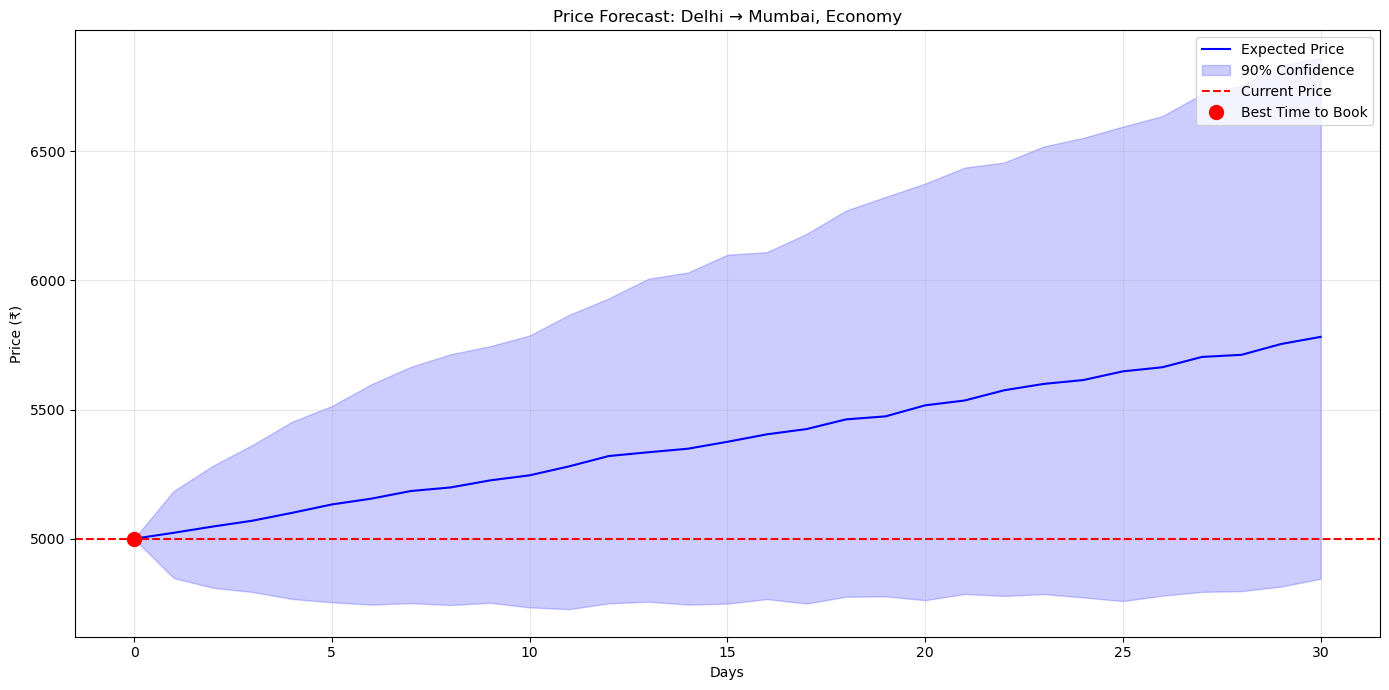


Summary:
            route    class  days_left  current_price  optimal_day  \
0  Delhi → Mumbai  Economy         30           5000            0   

   optimal_price  savings  pct_savings  probability_increase_day1    action  
0         5000.0      0.0          0.0                       59.5  Book now  


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#mumbai/delhi forecast
route = "Delhi → Mumbai"
travel_class = "Economy"

mean_daily_change = 0.005  
std_daily_change = 0.02    
days_left = 30  #flight is in 30 days
price = 5000    #current ticket price

#run simulation - more sims = more accurate
simulations = 1000
np.random.seed(42)  

sim_results = np.zeros((simulations, days_left + 1))
sim_results[:, 0] = price

print(f"simulating {route}...")

# main simulation loop
for s in range(simulations):
    curr = price
    for i in range(1, days_left + 1):
        # simple model - definitely room for improvement
        change = np.random.normal(mean_daily_change, std_daily_change)
        # price can't go down more than 30% in a day - airline policy
        if change < -0.3:
            change = -0.3
        curr = curr * (1 + change)
        sim_results[s, i] = curr

        if curr <= 0: # just in case, though should never happen
            print("weird price detected")
            curr = price * 0.5 # reset to half original price

# calculate metrics from sim
median = np.median(sim_results, axis=0)
low = np.percentile(sim_results, 5, axis=0)
high = np.percentile(sim_results, 95, axis=0)

#find best day
min_day = np.argmin(median)
best_price = median[min_day]

#calc savings
diff = price - best_price
pct_saved = (diff / price) * 100

#risk analysis
inc_prob = []
for d in range(1, len(median)):
    n = 0
    for s in range(simulations):
        if sim_results[s, d] > sim_results[s, d-1]:
            n += 1
    inc_prob.append(n / simulations * 100)

# recc
print("\nBooking Recc:")
if min_day <= 5: # if optimal day is soon, just book now to avoid risk
    print(f"Book now at ₹{price:.2f}")
else:
    print(f"Wait {min_day} days -> ~₹{best_price:.2f}")
    print(f"You'll save ~₹{diff:.2f} ({pct_saved:.1f}%)")

print("\nDaily risk:")
for d in range(min(7, len(inc_prob))): # only show first week
    print(f"Day {d+1}: {inc_prob[d]:.1f}% chance price goes up")

#detailed analysis
min_price_overall = np.min(median)
max_price_overall = np.max(median)
expected_final = median[-1]


# make chart
plt.figure(figsize=(14, 7))
x = np.arange(days_left + 1)
plt.plot(x, median, 'b-', label='Expected Price')
plt.fill_between(x, low, high, color='b', alpha=0.2, label='90% Confidence')
plt.axhline(y=price, color='r', linestyle='--', label='Current Price')
plt.plot(min_day, best_price, 'ro', markersize=10, label='Best Time to Book')

plt.title(f'Price Forecast: {route}, {travel_class}')
plt.xlabel('Days')
plt.ylabel('Price (₹)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('price_forecast.png', dpi=300)
plt.show()

# save data
df = pd.DataFrame({
    'route': [route],
    'class': [travel_class],
    'days_left': [days_left],
    'current_price': [price],
    'optimal_day': [min_day],
    'optimal_price': [best_price],
    'savings': [diff],
    'pct_savings': [pct_saved],
    'probability_increase_day1': [inc_prob[0]],
    'action': ["Book now" if min_day <= 5 else f"Wait {min_day} days"]
})

print("\nSummary:")
print(df)

**#REINFORCEMENT OF LEARNING FOR DYNAMIC PRICING STRATEGY#**

Training RL pricing agent...
Episode 100/1000, Revenue: $542000.00, Epsilon: 0.61
Episode 200/1000, Revenue: $532000.00, Epsilon: 0.37
Episode 300/1000, Revenue: $566750.00, Epsilon: 0.22
Episode 400/1000, Revenue: $568000.00, Epsilon: 0.13
Episode 500/1000, Revenue: $567750.00, Epsilon: 0.08
Episode 600/1000, Revenue: $571750.00, Epsilon: 0.05
Episode 700/1000, Revenue: $571250.00, Epsilon: 0.03
Episode 800/1000, Revenue: $569750.00, Epsilon: 0.02
Episode 900/1000, Revenue: $568750.00, Epsilon: 0.01
Episode 1000/1000, Revenue: $558500.00, Epsilon: 0.01

Results:
Fixed Price Revenue: $500000.00
RL Agent Revenue: $563375.00
Improvement: 12.7%


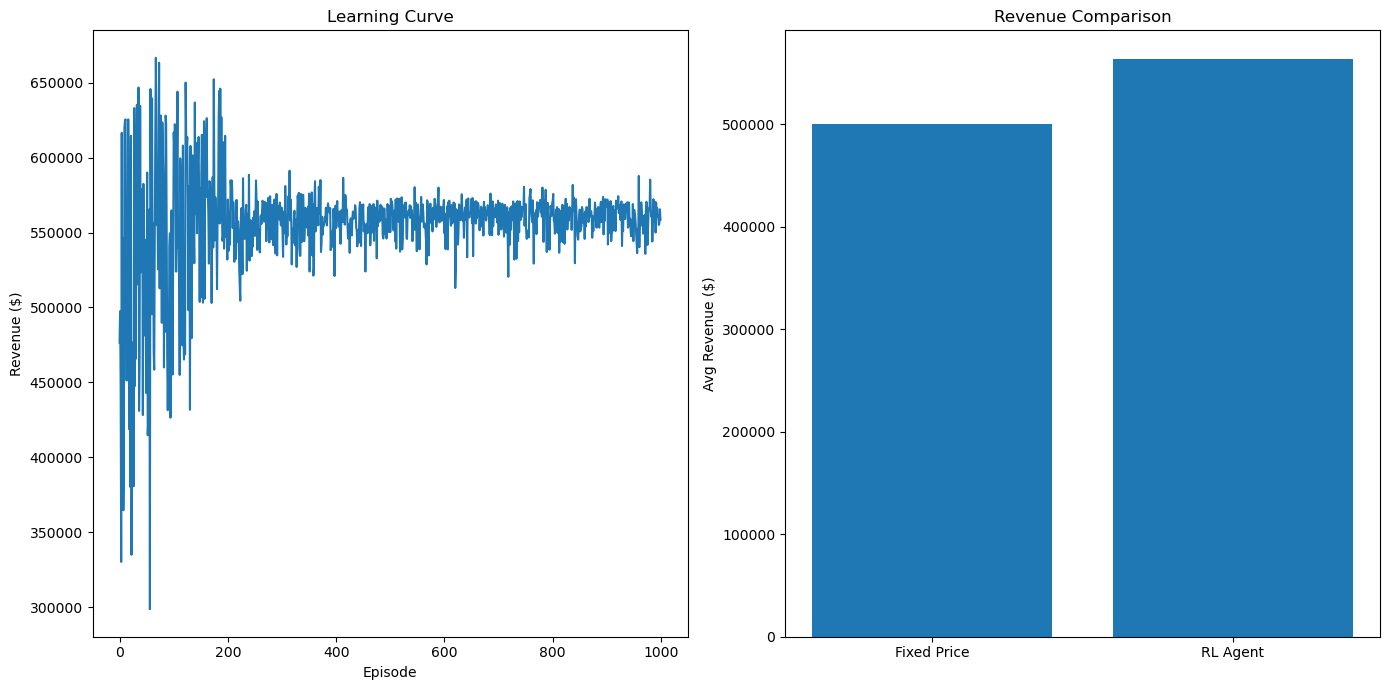

In [25]:
import random

#basic params
MAX_DAYS = 60
SEATS = 100
BASE_PRICE = 5000

#RL config 
days_bins = 6
seats_bins = 10
price_bins = 5
actions = [-0.1, -0.05, 0, 0.05, 0.1]  # % changes

#TODO: add more actions for finer control?
#actions = [-0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15]

# hyperparams (still need to tune these)
alpha = 0.1     #learning rate
gamma = 0.95    #discount
epsilon = 1.0   #exploration
eps_decay = 0.995

# init q-table
q_table = np.zeros((days_bins, seats_bins, price_bins, len(actions)))

def calc_demand(price, days, random_factor=True):
    """Simple demand model"""
    base = 2.0   # avg bookings per day with base price
    p_factor = np.exp(-0.0001 * (price - BASE_PRICE))
    d_factor = 1 + 0.5 * (1 - days / MAX_DAYS)  # more demand closer to departure
    
    if random_factor:
        rand = np.random.normal(1, 0.3)
    else:
        rand = 1.0
        
    return base * p_factor * d_factor * rand

#for tracking performance
total_rev = []

# train for 1000 episodes (flights)
print("Training RL pricing agent...")
for episode in range(1000):
    # init new flight
    days = MAX_DAYS
    seats = SEATS
    price = BASE_PRICE
    flight_rev = 0
    prices = [BASE_PRICE]
    bookings = [0]
    
    #run until flight date or sold out
    while days > 0 and seats > 0:
        # discretize state
        s_days = min(days_bins - 1, int(days / MAX_DAYS * days_bins))
        s_seats = min(seats_bins - 1, int(seats / SEATS * seats_bins))
        
        # this could be improved
        s_price = min(price_bins - 1, int(price / (BASE_PRICE * 2) * price_bins))
        
        # epsilon-greedy
        if random.random() < epsilon:
            # explore - try random action
            a_idx = random.randint(0, len(actions)-1)
        else:
            # exploit - use best known action
            a_idx = np.argmax(q_table[s_days, s_seats, s_price])
        
        # apply price change
        delta = actions[a_idx] * BASE_PRICE
        new_p = price + delta
        
        # enforce min/max price limits
        if new_p < 0.5 * BASE_PRICE:
            new_p = 0.5 * BASE_PRICE
        if new_p > 2 * BASE_PRICE:
            new_p = 2 * BASE_PRICE
        
        # calc & apply bookings
        demand = calc_demand(new_p, days)
        today_bookings = int(max(0, min(demand, seats)))
        
        # update state
        price = new_p
        seats -= today_bookings
        days -= 1
        
        # calc reward
        today_rev = today_bookings * price
        flight_rev += today_rev
        
        # track history
        prices.append(price)
        bookings.append(today_bookings)
        
        # get next state
        s_days_next = min(days_bins - 1, int(days / MAX_DAYS * days_bins))
        s_seats_next = min(seats_bins - 1, int(seats / SEATS * seats_bins))
        s_price_next = min(price_bins - 1, int(price / (BASE_PRICE * 2) * price_bins))
        
        # Q-learning update
        old_q = q_table[s_days, s_seats, s_price, a_idx]
        max_q_next = np.max(q_table[s_days_next, s_seats_next, s_price_next])
        new_q = (1-alpha)*old_q + alpha*(today_rev + gamma*max_q_next)
        q_table[s_days, s_seats, s_price, a_idx] = new_q
    
    # save episode results
    total_rev.append(flight_rev)
    
    #decay exploration rate
    epsilon *= eps_decay
    
    # show progress
    if (episode+1) % 100 == 0:
        print(f"Episode {episode+1}/1000, Revenue: ${flight_rev:.2f}, Epsilon: {epsilon:.2f}")

# test against fixed price
fixed_rev_total = 0
rl_rev_total = 0

n_test = 10  # number of test flights
for i in range(n_test):
    # Run fixed price scenario
    days = MAX_DAYS
    seats = SEATS
    price = BASE_PRICE  # constant price
    this_rev = 0
    
    while days > 0 and seats > 0:
        # calc demand with fixed price
        demand = calc_demand(price, days)
        booked = int(max(0, min(demand, seats)))
        
        this_rev += booked * price
        seats -= booked
        days -= 1
    
    fixed_rev_total += this_rev
    
    # Run RL agent scenario 
    days = MAX_DAYS
    seats = SEATS
    price = BASE_PRICE
    this_rev = 0
    
    #Prices for plotting
    rl_prices = [price]
    
    while days > 0 and seats > 0:
        # get state
        s_days = min(days_bins - 1, int(days / MAX_DAYS * days_bins))
        s_seats = min(seats_bins - 1, int(seats / SEATS * seats_bins))
        s_price = min(price_bins - 1, int(price / (BASE_PRICE * 2) * price_bins))
        
        # use best action from q-table
        a_idx = np.argmax(q_table[s_days, s_seats, s_price])
        delta = actions[a_idx] * BASE_PRICE
        
        # apply price change
        price = price + delta
        
        # keep price in range
        if price < 0.5 * BASE_PRICE:
            price = 0.5 * BASE_PRICE
        if price > 2 * BASE_PRICE:
            price = 2 * BASE_PRICE
            
        rl_prices.append(price)
        
        # calc bookings with this price
        demand = calc_demand(price, days)
        booked = int(max(0, min(demand, seats)))
        
        this_rev += booked * price
        seats -= booked
        days -= 1
    
    rl_rev_total += this_rev

# average results
fixed_avg = fixed_rev_total / n_test
rl_avg = rl_rev_total / n_test
improve_pct = (rl_avg - fixed_avg) / fixed_avg * 100

#show results
print("\nResults:")
print(f"Fixed Price Revenue: ${fixed_avg:.2f}")
print(f"RL Agent Revenue: ${rl_avg:.2f}")
print(f"Improvement: {improve_pct:.1f}%")

#plotting
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(total_rev)
plt.title('Learning Curve')
plt.xlabel('Episode')
plt.ylabel('Revenue ($)')

# compare
plt.subplot(1, 2, 2)
plt.bar(['Fixed Price', 'RL Agent'], [fixed_avg, rl_avg])
plt.title('Revenue Comparison')
plt.ylabel('Avg Revenue ($)')
plt.tight_layout()
plt.savefig('rl_pricing_results.png', dpi=300)
plt.show()